In [44]:
#data processing
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# cross validation
from sklearn.model_selection import train_test_split

# import svm model
from sklearn import svm
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# model optimization
from sklearn.model_selection import GridSearchCV

Loading Dataset

In [45]:
tele_df = pd.read_csv('Datasets/bob/Telco_customer_churn.csv')
tele_df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


Data Cleansing

In [46]:
# print the name of the features and label
tele_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [47]:
# check unique values to define which one is unused and must be on  category type
tele_df.nunique()

CustomerID           7043
Count                   1
Country                 1
State                   1
City                 1129
Zip Code             1652
Lat Long             1652
Latitude             1652
Longitude            1651
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Total Charges        6531
Churn Label             2
Churn Value             2
Churn Score            85
CLTV                 3438
Churn Reason           20
dtype: int64

In [48]:
# drop unused column
tele_df = tele_df.drop(['CustomerID','Count','Country','State', 'Lat Long', 'Latitude', 'Longitude','Total Charges','Senior Citizen','Partner','Dependents','Paperless Billing','Payment Method','Churn Label','Phone Service','Multiple Lines','Internet Service','Online Security','Online Backup','Device Protection','Tech Support','Streaming TV','Streaming Movies','Contract','Churn Reason'], axis=1)
tele_df

,City,Zip Code,Gender,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
0,Los Angeles,90003,Male,2,53.85,1,86,3239
1,Los Angeles,90005,Female,2,70.70,1,67,2701
2,Los Angeles,90006,Female,8,99.65,1,86,5372
3,Los Angeles,90010,Female,28,104.80,1,84,5003
4,Los Angeles,90015,Male,49,103.70,1,89,5340
...,...,...,...,...,...,...,...,...
7038,Landers,92285,Female,72,21.15,0,45,5306
7039,Adelanto,92301,Male,24,84.80,0,59,2140
7040,Amboy,92304,Female,72,103.20,0,71,5560
7041,Angelus Oaks,92305,Female,11,29.60,0,59,2793


In [49]:
# change into category type
cat_cols = ['City','Gender']
tele_df[cat_cols] = tele_df[cat_cols].astype('category')
tele_df.dtypes

City               category
Zip Code              int64
Gender             category
Tenure Months         int64
Monthly Charges     float64
Churn Value           int64
Churn Score           int64
CLTV                  int64
dtype: object

In [50]:
tele_df['City'].cat.categories

Index(['Acampo', 'Acton', 'Adelanto', 'Adin', 'Agoura Hills', 'Aguanga',
       'Ahwahnee', 'Alameda', 'Alamo', 'Albany',
       ...
       'Yermo', 'Yorba Linda', 'Yorkville', 'Yosemite National Park',
       'Yountville', 'Yreka', 'Yuba City', 'Yucaipa', 'Yucca Valley', 'Zenia'],
      dtype='object', length=1129)

In [51]:
tele_df['Gender'].cat.categories

Index(['Female', 'Male'], dtype='object')

Check Missing Values & Duplicates

In [52]:
tele_df.isnull().sum()
tele_df.dropna(axis=1)
# data.info()


,City,Zip Code,Gender,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
0,Los Angeles,90003,Male,2,53.85,1,86,3239
1,Los Angeles,90005,Female,2,70.70,1,67,2701
2,Los Angeles,90006,Female,8,99.65,1,86,5372
3,Los Angeles,90010,Female,28,104.80,1,84,5003
4,Los Angeles,90015,Male,49,103.70,1,89,5340
...,...,...,...,...,...,...,...,...
7038,Landers,92285,Female,72,21.15,0,45,5306
7039,Adelanto,92301,Male,24,84.80,0,59,2140
7040,Amboy,92304,Female,72,103.20,0,71,5560
7041,Angelus Oaks,92305,Female,11,29.60,0,59,2793


In [53]:
tele_df.duplicated().sum()

0

Exploratory Data Analysis

In [54]:
tele_df.describe()

,Zip Code,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,93521.964646,32.371149,64.761692,0.265370,58.699418,4400.295755
std,1865.794555,24.559481,30.090047,0.441561,21.525131,1183.057152
min,90001.000000,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,92102.000000,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,93552.000000,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,95351.000000,55.000000,89.850000,1.000000,75.000000,5380.500000
max,96161.000000,72.000000,118.750000,1.000000,100.000000,6500.000000


In [55]:
tele_df.describe(include='category')

,City,Gender
count,7043,7043
unique,1129,2
top,Los Angeles,Male
freq,305,3555


Check Variable Target Distribution i.e Churn Value

<Axes: xlabel='Churn Value'>

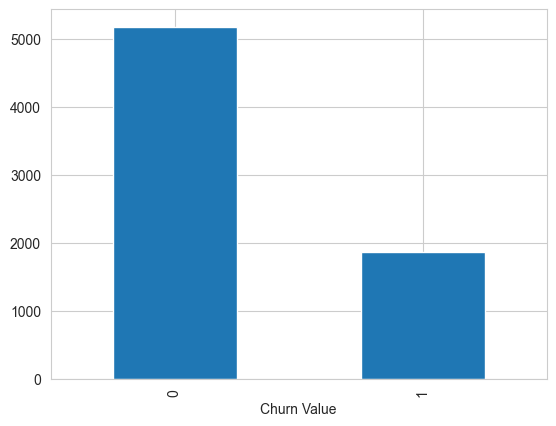

In [56]:
tele_df['Churn Value'].value_counts().plot(kind='bar')

# the target variable 'Churn Value' has two values, namely 0 and 1
# 0 means that the customer will not leave the telecom
# 1 means the customer is likely to leave the telcom

checking Outliers using Z-score

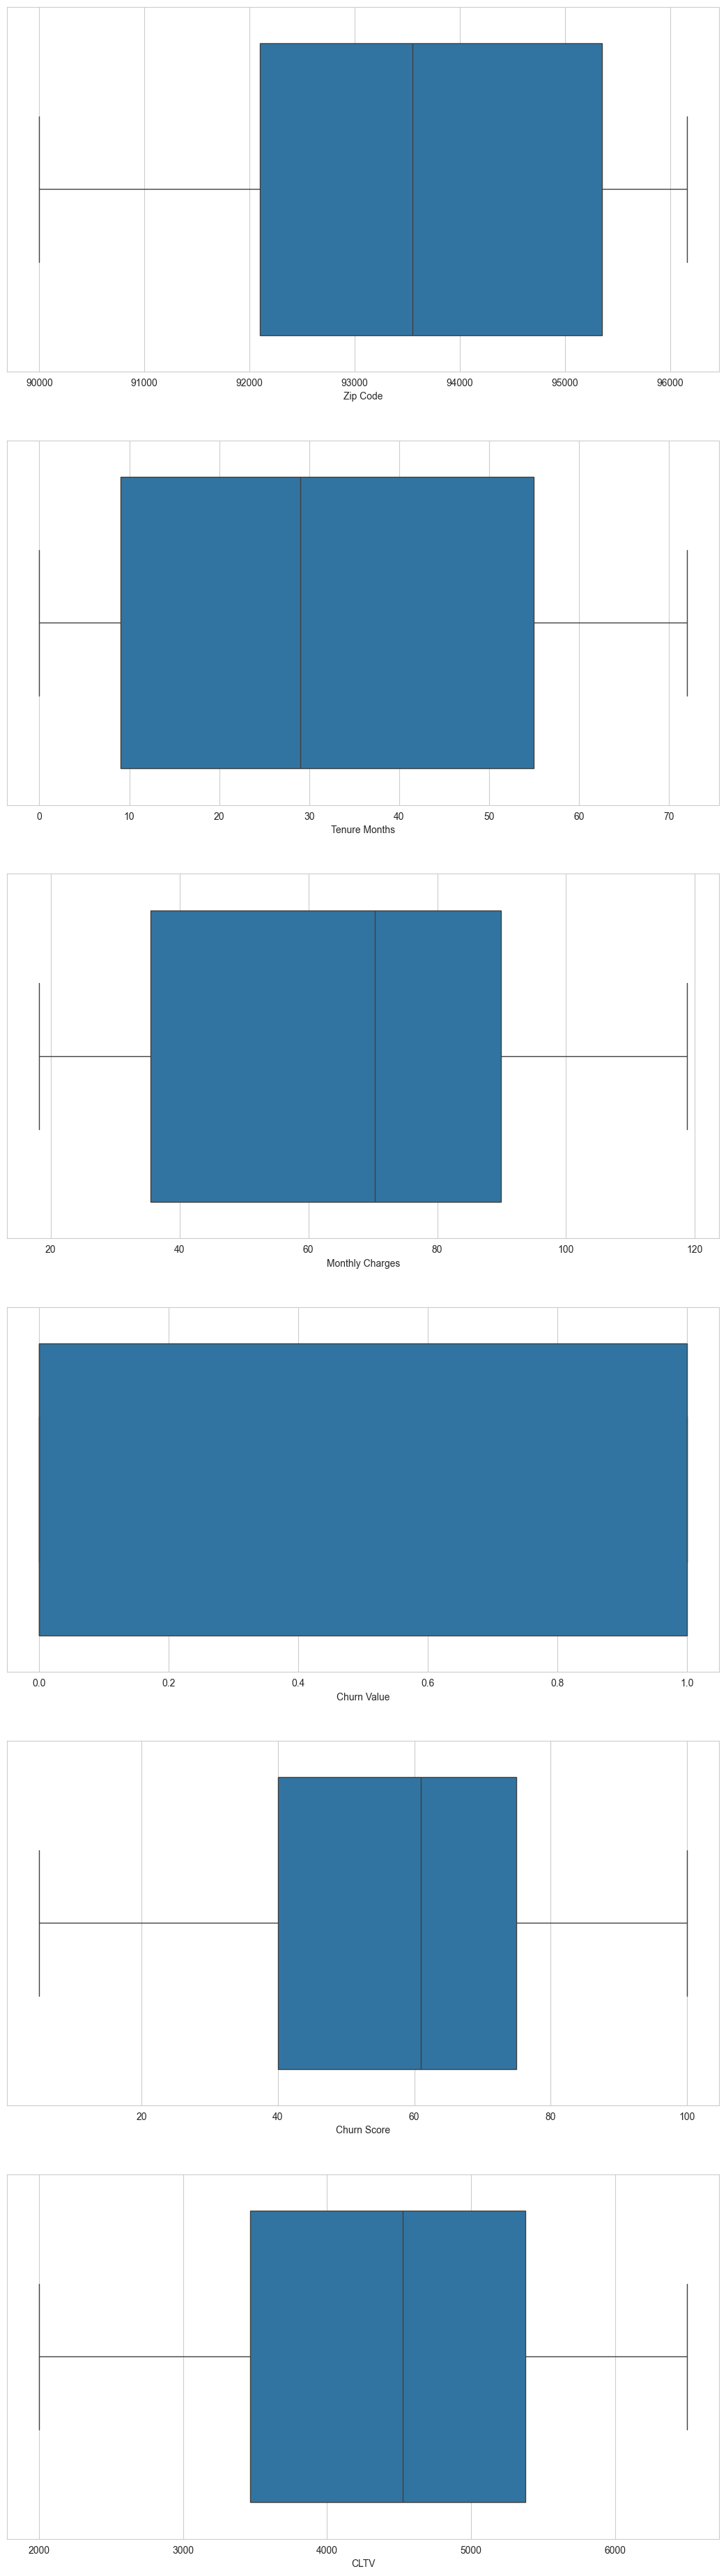

In [57]:
num_cols = list(tele_df.columns)
# num_cols
for x in cat_cols:
    num_cols.remove(x)
    # print(num_cols)
# # check outlier
fig, ax = plt.subplots(ncols=1, nrows=6, figsize=(12,38))
# using padding
fig.tight_layout(pad=5.0)

i=0
for col in num_cols:
    sns.boxplot(data=tele_df, x=col, ax=ax[i])
    i=i+1

In [58]:
def detect_outlier(data):
    outliers=[]
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)

    for y in data:
        z_score = (y - mean)/ std
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

for item in num_cols:
    mean = np.mean(tele_df[f'{item}'])
    print(f'Outliers {item} : {mean}')
    outliers = detect_outlier(tele_df[f'{item}'])
    if outliers: print(outliers)

Outliers Zip Code : 93521.96464574755
Outliers Tenure Months : 32.37114865824223
Outliers Monthly Charges : 64.76169246059918
Outliers Churn Value : 0.2653698707936959
Outliers Churn Score : 58.69941786170666
Outliers CLTV : 4400.295754650007


One-Hot Encoding
is a process used to represent categorical variables as numerical data.

In [59]:
# we use the get_dummies class in pandas to change our categorical values to numerical
# as seen we specified the dtype to int, because get_dummies class has it's default set to boolean
tele_df = pd.get_dummies(tele_df, columns= cat_cols, dtype=int)
tele_df.head()

,Zip Code,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV,City_Acampo,City_Acton,City_Adelanto,City_Adin,...,City_Yorkville,City_Yosemite National Park,City_Yountville,City_Yreka,City_Yuba City,City_Yucaipa,City_Yucca Valley,City_Zenia,Gender_Female,Gender_Male
0,90003,2,53.85,1,86,3239,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,90005,2,70.70,1,67,2701,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,90006,8,99.65,1,86,5372,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,90010,28,104.80,1,84,5003,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,90015,49,103.70,1,89,5340,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Correlation of Predictor Variables with Target Variables

In [60]:
# here we check the correlations between the predictor variables (known as features) and 
# the target variable, because this can help to identify which features are most important for predicting the target
# if a feature is highly correlated with the target, it's likely that it will be an important
# predictor of the target and vice versa

corr = tele_df.corr()
corr
# f, ax = plt.subplots(figsize=(10,8))
# sns.heatmap(corr, annot=True, fmt=".2f", cmap='YlGnBu')
# plt.show()

,Zip Code,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV,City_Acampo,City_Acton,City_Adelanto,City_Adin,...,City_Yorkville,City_Yosemite National Park,City_Yountville,City_Yreka,City_Yuba City,City_Yucaipa,City_Yucca Valley,City_Zenia,Gender_Female,Gender_Male
Zip Code,1.000000,0.001041,-0.004596,0.003346,-0.002769,-0.003562,0.021696,-0.000153,-0.017443,0.031739,...,0.025197,0.023856,0.013762,0.032902,0.044646,-0.014349,-0.017686,0.026488,-0.015493,0.015493
Tenure Months,0.001041,1.000000,0.247900,-0.352229,-0.224987,0.396406,0.001824,0.000125,0.005675,-0.007883,...,0.008376,0.008133,0.004493,0.007648,-0.003771,0.021481,-0.007132,-0.001331,-0.005106,0.005106
Monthly Charges,-0.004596,0.247900,1.000000,0.193356,0.133754,0.098693,0.030385,0.003774,-0.007266,-0.006130,...,0.001179,0.013985,-0.009527,0.011211,-0.004244,0.029216,0.006749,-0.004565,0.014569,-0.014569
Churn Value,0.003346,-0.352229,0.193356,1.000000,0.664897,-0.127463,0.026165,-0.014327,-0.003946,0.012668,...,-0.000830,0.012668,-0.014327,-0.014327,-0.001174,-0.000830,-0.016020,-0.000830,0.008612,-0.008612
Churn Score,-0.002769,-0.224987,0.133754,0.664897,1.000000,-0.079782,0.024976,-0.013234,0.013003,-0.006035,...,0.003656,0.003656,-0.015726,-0.020433,-0.009909,0.013347,-0.008544,-0.005759,-0.000311,0.000311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
City_Yucaipa,-0.014349,0.021481,0.029216,-0.000830,0.013347,0.012337,-0.000568,-0.000568,-0.000635,-0.000568,...,-0.000568,-0.000568,-0.000568,-0.000568,-0.000804,1.000000,-0.000635,-0.000568,0.012146,-0.012146
City_Yucca Valley,-0.017686,-0.007132,0.006749,-0.016020,-0.008544,-0.016468,-0.000635,-0.000635,-0.000710,-0.000635,...,-0.000635,-0.000635,-0.000635,-0.000635,-0.000899,-0.000635,1.000000,-0.000635,0.005585,-0.005585
City_Zenia,0.026488,-0.001331,-0.004565,-0.000830,-0.005759,-0.008167,-0.000568,-0.000568,-0.000635,-0.000568,...,-0.000568,-0.000568,-0.000568,-0.000568,-0.000804,-0.000568,-0.000635,1.000000,0.000227,-0.000227
Gender_Female,-0.015493,-0.005106,0.014569,0.008612,-0.000311,0.006851,0.000227,0.012146,-0.005077,0.012146,...,0.000227,0.024066,0.000227,0.012146,0.000321,0.012146,0.005585,0.000227,1.000000,-1.000000


In [61]:
churn_corr= corr[['Churn Value']]
churn_corr
# sns.heatmap(corr, annot=True, fmt=".2f", cmap='YlGnBu')

,Churn Value
Zip Code,0.003346
Tenure Months,-0.352229
Monthly Charges,0.193356
Churn Value,1.000000
Churn Score,0.664897
...,...
City_Yucaipa,-0.000830
City_Yucca Valley,-0.016020
City_Zenia,-0.000830
Gender_Female,0.008612


In [62]:
high_corr = churn_corr[abs(churn_corr['Churn Value'])>= 0.1]
high_corr.sort_values(by='Churn Value', ascending=False)

,Churn Value
Churn Value,1.000000
Churn Score,0.664897
Monthly Charges,0.193356
CLTV,-0.127463
Tenure Months,-0.352229


In [63]:
high_corr_columns = list(high_corr.index)
high_corr_columns.remove('Churn Value')
high_corr_columns

['Tenure Months', 'Monthly Charges', 'Churn Score', 'CLTV']

Visualize Data

In [64]:
tele_df

,Zip Code,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV,City_Acampo,City_Acton,City_Adelanto,City_Adin,...,City_Yorkville,City_Yosemite National Park,City_Yountville,City_Yreka,City_Yuba City,City_Yucaipa,City_Yucca Valley,City_Zenia,Gender_Female,Gender_Male
0,90003,2,53.85,1,86,3239,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,90005,2,70.70,1,67,2701,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,90006,8,99.65,1,86,5372,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,90010,28,104.80,1,84,5003,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,90015,49,103.70,1,89,5340,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,92285,72,21.15,0,45,5306,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7039,92301,24,84.80,0,59,2140,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
7040,92304,72,103.20,0,71,5560,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7041,92305,11,29.60,0,59,2793,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


<Axes: xlabel='Monthly Charges', ylabel='Count'>

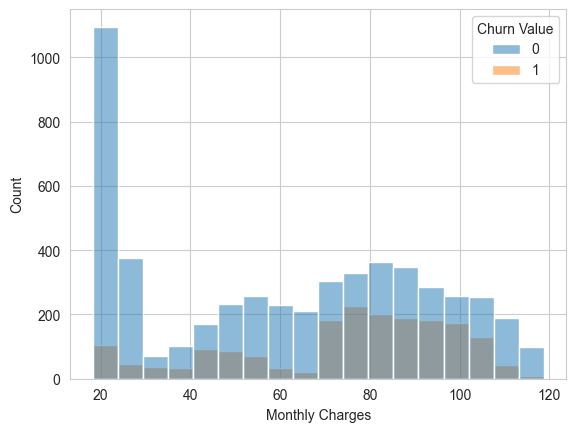

In [65]:
# check monthly charges distribution
sns.histplot(tele_df, x='Monthly Charges', hue='Churn Value')


<Axes: xlabel='Tenure Months', ylabel='Count'>

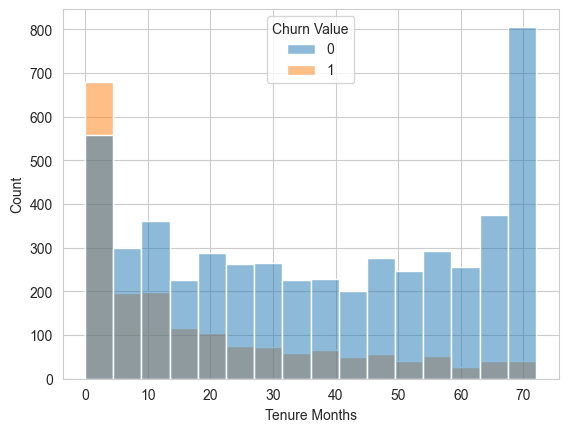

In [66]:
# check Tenure distribution
sns.histplot(tele_df, x='Tenure Months', hue='Churn Value')


<Axes: xlabel='Churn Score', ylabel='Count'>

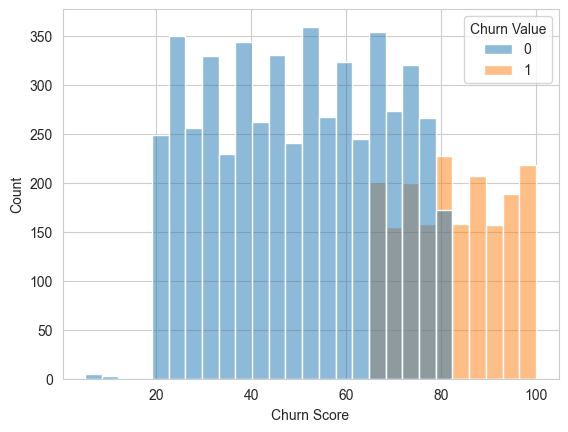

In [67]:
# check Churn score distribution
sns.histplot(tele_df, x='Churn Score', hue='Churn Value')

<Axes: xlabel='CLTV', ylabel='Count'>

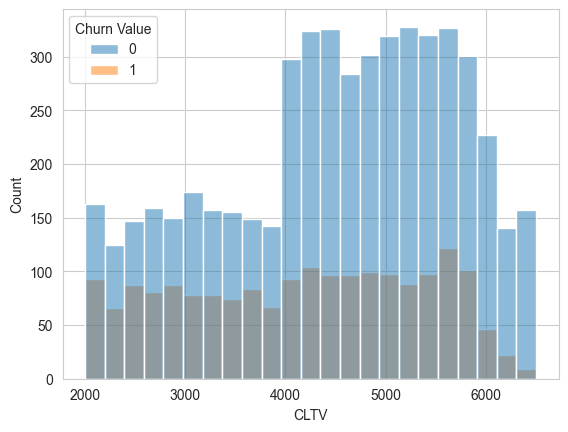

In [68]:
# check CLTV distribution
sns.histplot(tele_df, x='CLTV', hue='Churn Value')

SPLIT TRAIN-TEST DATA

In [69]:
df= tele_df.copy()
X_raw = df.drop(columns=['Churn Value'])

X = X_raw.values
y = df['Churn Value'].values

In [70]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
print('Train - X:', x_train.shape, 'y:', y_train.shape)
print('Test - X:', x_test.shape, 'y:', y_test.shape)

Train - X: (5634, 1136) y: (5634,)
Test - X: (1409, 1136) y: (1409,)


In [72]:
# Optional: prepares the columns index for the experiment if only columns with high correlation are taken
idx_high_corr_columns = [X_raw.columns.get_loc(c) for c in high_corr_columns if c in X_raw]
idx_high_corr_columns

[1, 2, 3, 4]

Standardization Data

In [73]:
# in this case we know that range each columns is different
pd.DataFrame({
    'columns': tele_df.columns,
    'min': list(tele_df.min()),
    'max': list(tele_df.max())
}).sort_values(by='min')

,columns,min,max
568,City_Los Angeles,0.00,1.00
748,City_Palos Verdes Peninsula,0.00,1.00
749,City_Panorama City,0.00,1.00
750,City_Paradise,0.00,1.00
751,City_Paramount,0.00,1.00
...,...,...,...
382,City_Gold Run,0.00,1.00
4,Churn Score,5.00,100.00
2,Monthly Charges,18.25,118.75
5,CLTV,2003.00,6500.00


In [74]:
# because of that we need to try scaled data
ss = StandardScaler()

x_train_ss = ss.fit_transform(x_train)
x_test_ss = ss.fit_transform(x_test)

Model Building

SVM - Support Vector Machine

In [75]:
# create a svm classifier
svc = svm.SVC(kernel='linear') # linear kernel

# train the model using train dataset
svc.fit(x_train, y_train)

#predict the churn for test dataset
y_pred = svc.predict(x_test)

In [76]:
# model accuracy
svc_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy Train:", metrics.accuracy_score(y_train, svc.predict(x_train)))
print("Accuracy Test:", svc_acc)

Accuracy Train: 0.9153354632587859
Accuracy Test: 0.8892831795599716


Build Model with Scaled Data

In [77]:
# create a svm classifier
svc_ss = svm.SVC(kernel='linear')

# train the model using the train data
svc_ss.fit(x_train_ss, y_train)

# predict the churn for test dataset
y_pred_ss = svc_ss.predict(x_test_ss)

In [78]:
# model accuracy
svc_ss_acc = metrics.accuracy_score(y_test, y_pred_ss)
print("The Model Trained with Scaled Data")
print("Accuracy Train:", metrics.accuracy_score(y_train, svc_ss.predict(x_train)))
print("Accuracy Test:", svc_ss_acc)

The Model Trained with Scaled Data
Accuracy Train: 0.7392616258430955
Accuracy Test: 0.8850248403122782


Model Optimization 
N.B just incase

In [79]:
x_train_ss_hc = x_train_ss[:,idx_high_corr_columns]
x_test_ss_hc = x_test_ss[:,idx_high_corr_columns]

GRID SEARCH CV

In [80]:
grid_params = {
    'C': [0.1,1,10],
    'gamma': [1,0.1,0.001],
    'kernel': ['linear','rbf']
}
svc_model = svm.SVC()
model_grid = GridSearchCV(svc_model, grid_params)

In [81]:
model_grid.fit(x_train_ss_hc, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.001],
                         'kernel': ['linear', 'rbf']})

In [82]:
GridSearchCV(estimator=svm.SVC(), param_grid={'C': [0.1,1,10],'gamma': [1,0.1,0.001],'kernel':['linear', 'rbf']})

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.001],
                         'kernel': ['linear', 'rbf']})

In [83]:
model_grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [84]:
{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [85]:
# predict the churn for test dataset
y_pred_grid = model_grid.predict(x_test_ss_hc)

# model accuracy
grid_acc = metrics.accuracy_score(y_test, y_pred_grid)
print("SVM {'C': 1, 'gamma': 1, 'Kernel': 'rbf'}")
print("Accuracy Train:", metrics.accuracy_score(y_train, model_grid.predict(x_train_ss_hc)))
print("Accuracy Test", grid_acc)

SVM {'C': 1, 'gamma': 1, 'Kernel': 'rbf'}
Accuracy Train: 0.9305999290024849
Accuracy Test 0.9006387508871541
